In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset=pd.read_csv("/home/moeenuddin/Desktop/all_projects_ML/Remote_Employee_Burnout_Predictor/Remote_Employee_Burnout_Predictor/dataset/processed/burnout_processed.csv")

In [4]:
df=dataset

In [5]:
df.head()


,day_type,work_hours,screen_time_hours,meetings_count,breaks_taken,after_hours_work,app_switches,sleep_hours,task_completion,isolation_index,fatigue_score,burnout_risk,work_hours_7d_avg,fatigue_3d_sum,is_weekend,meetings_7d_avg,effort_recovery_ratio,context_switch_load
0,0,7.34,6.09,4,5,1,34,7.98,77.73,3,2.73,0,7.34,2.73,0,4.0,0.908416,136
1,0,7.32,5.82,5,6,0,36,6.27,79.98,3,5.39,0,7.33,8.12,0,4.5,1.149137,180
2,0,7.28,5.28,0,8,0,42,8.23,91.83,3,3.76,0,7.31,11.88,0,3.0,0.873950,0
3,0,8.26,6.01,4,9,0,67,7.54,87.21,3,5.60,0,7.55,14.75,0,3.2,1.081152,268
4,0,7.23,5.98,3,5,0,47,7.02,86.67,4,3.70,0,7.49,13.06,0,3.2,1.015449,141


In [6]:
df.columns

Index(['day_type', 'work_hours', 'screen_time_hours', 'meetings_count',
       'breaks_taken', 'after_hours_work', 'app_switches', 'sleep_hours',
       'task_completion', 'isolation_index', 'fatigue_score', 'burnout_risk',
       'work_hours_7d_avg', 'fatigue_3d_sum', 'is_weekend', 'meetings_7d_avg',
       'effort_recovery_ratio', 'context_switch_load'],
      dtype='str')

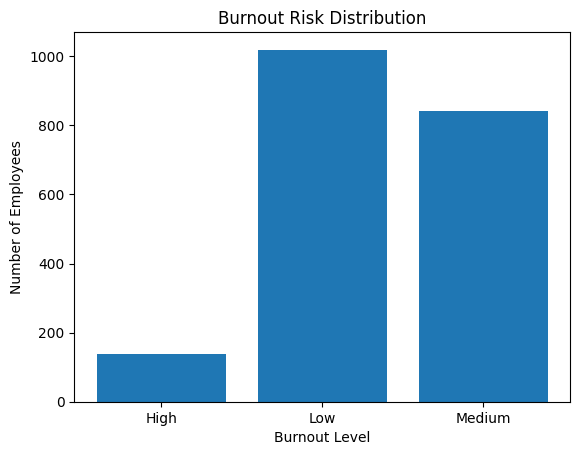

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/home/moeenuddin/Desktop/all_projects_ML/Remote_Employee_Burnout_Predictor/Remote_Employee_Burnout_Predictor/dataset/processed/burnout_processed.csv")

# Map target labels for readability
label_map = {0: "Low", 1: "Medium", 2: "High"}
df["burnout_label"] = df["burnout_risk"].map(label_map)

# Count classes
counts = df["burnout_label"].value_counts().sort_index()

plt.figure()
plt.bar(counts.index, counts.values)
plt.xlabel("Burnout Level")
plt.ylabel("Number of Employees")
plt.title("Burnout Risk Distribution")
plt.show()

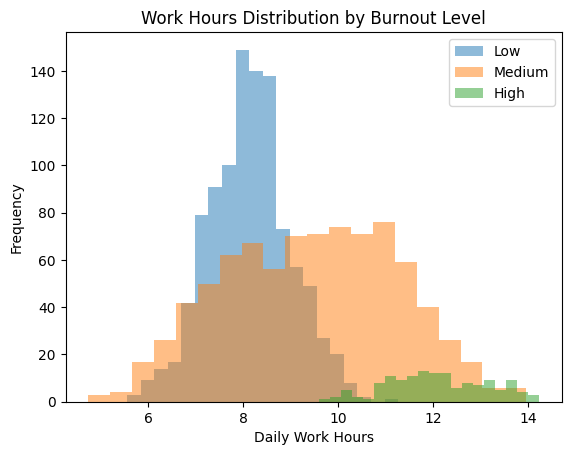

In [8]:
plt.figure()
for level in df["burnout_label"].unique():
    subset = df[df["burnout_label"] == level]
    plt.hist(subset["work_hours"], bins=20, alpha=0.5)

plt.xlabel("Daily Work Hours")
plt.ylabel("Frequency")
plt.title("Work Hours Distribution by Burnout Level")
plt.legend(["Low", "Medium", "High"])
plt.show()

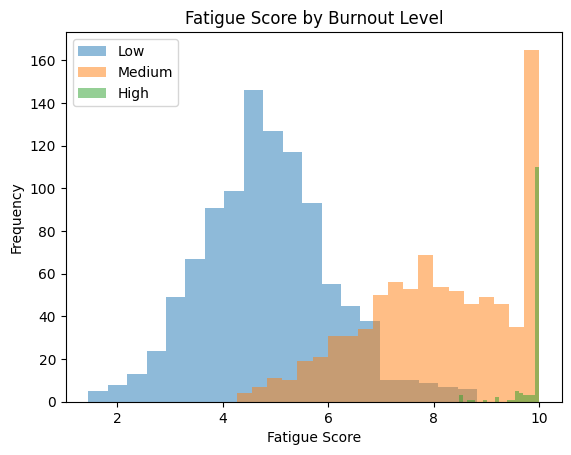

In [9]:
plt.figure()
for level in df["burnout_label"].unique():
    subset = df[df["burnout_label"] == level]
    plt.hist(subset["fatigue_score"], bins=20, alpha=0.5)

plt.xlabel("Fatigue Score")
plt.ylabel("Frequency")
plt.title("Fatigue Score by Burnout Level")
plt.legend(["Low", "Medium", "High"])
plt.show()

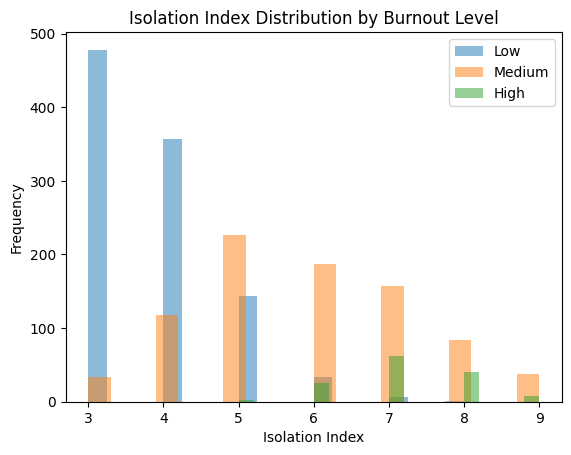

In [10]:
plt.figure()
for level in df["burnout_label"].unique():
    subset = df[df["burnout_label"] == level]
    plt.hist(subset["isolation_index"], bins=20, alpha=0.5)

plt.xlabel("Isolation Index")
plt.ylabel("Frequency")
plt.title("Isolation Index Distribution by Burnout Level")
plt.legend(["Low", "Medium", "High"])
plt.show()


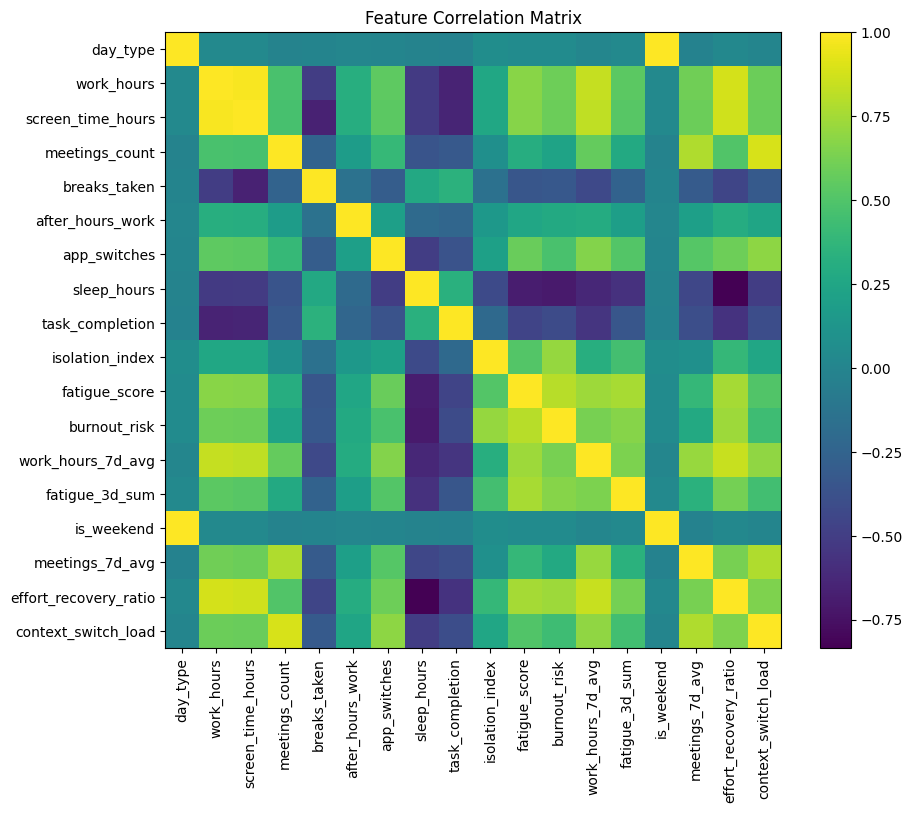

In [ ]:
#Correlation analysis helped identify 
# which behavioral metrics strongly relate to burnout risk

plt.figure(figsize=(10,8))
correlation = df.corr(numeric_only=True)

plt.imshow(correlation)
plt.colorbar()
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=90)
plt.yticks(range(len(correlation.columns)), correlation.columns)
plt.title("Feature Correlation Matrix")
plt.show()

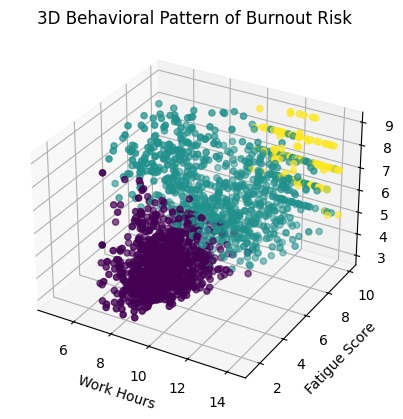

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load dataset
df = pd.read_csv("/home/moeenuddin/Desktop/all_projects_ML/Remote_Employee_Burnout_Predictor/Remote_Employee_Burnout_Predictor/dataset/processed/burnout_processed.csv")  # change path if needed

# Create 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 3D Scatter Plot
scatter = ax.scatter(
    df["work_hours"],
    df["fatigue_score"],
    df["isolation_index"],
    c=df["burnout_risk"]
)

# Labels
ax.set_xlabel("Work Hours")
ax.set_ylabel("Fatigue Score")
ax.set_zlabel("Isolation Index")
ax.set_title("3D Behavioral Pattern of Burnout Risk")

plt.show()

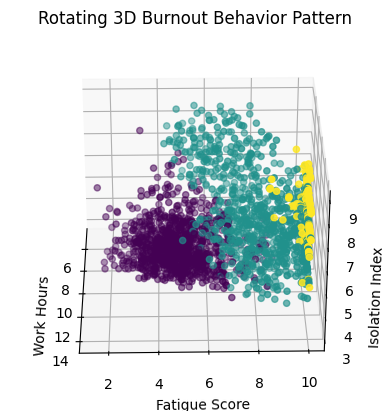

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Load dataset
df = pd.read_csv("/home/moeenuddin/Desktop/all_projects_ML/Remote_Employee_Burnout_Predictor/Remote_Employee_Burnout_Predictor/dataset/processed/burnout_processed.csv")  # change path

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df["work_hours"],
    df["fatigue_score"],
    df["isolation_index"],
    c=df["burnout_risk"]
)

ax.set_xlabel("Work Hours")
ax.set_ylabel("Fatigue Score")
ax.set_zlabel("Isolation Index")
ax.set_title("Rotating 3D Burnout Behavior Pattern")

# Rotation function
def update(angle):
    ax.view_init(elev=30, azim=angle)

ani = FuncAnimation(fig, update, frames=360, interval=50)

# Save as MP4
ani.save("burnout_3d_rotation.mp4")

plt.show()

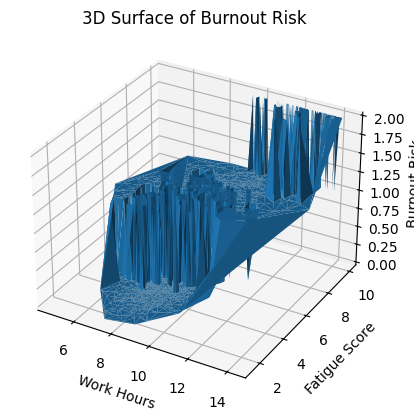

In [16]:
import numpy as np

# Create grid
x = df["work_hours"]
y = df["fatigue_score"]
z = df["burnout_risk"]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_trisurf(x, y, z)

ax.set_xlabel("Work Hours")
ax.set_ylabel("Fatigue Score")
ax.set_zlabel("Burnout Risk")
ax.set_title("3D Surface of Burnout Risk")

plt.show()